Варіант 5

In [ ]:
# !pip install tensorflow

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Dense,
    Dropout,
    Flatten,
    concatenate
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0 
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [ ]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    conv_3x3_reduce = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3_reduce)
    
    conv_5x5_reduce = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5_reduce)
    
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(max_pool)
    
    output = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

In [ ]:
inputs = Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), padding='valid', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

x = inception_module(x, filters_1x1=32, filters_3x3_reduce=48, filters_3x3=64, filters_5x5_reduce=8, filters_5x5=16, filters_pool_proj=16)
x = inception_module(x, filters_1x1=64, filters_3x3_reduce=64, filters_3x3=96, filters_5x5_reduce=16, filters_5x5=32, filters_pool_proj=32)

x = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

x = inception_module(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=64, filters_pool_proj=64)
x = inception_module(x, filters_1x1=192, filters_3x3_reduce=192, filters_3x3=256, filters_5x5_reduce=48, filters_5x5=96, filters_pool_proj=96)

x = inception_module(x, filters_1x1=256, filters_3x3_reduce=256, filters_3x3=384, filters_5x5_reduce=64, filters_5x5=128, filters_pool_proj=128)
x = inception_module(x, filters_1x1=384, filters_3x3_reduce=384, filters_3x3=512, filters_5x5_reduce=64, filters_5x5=128, filters_pool_proj=128)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)

feature_model = Model(inputs=inputs, outputs=predictions)

In [ ]:
feature_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='Adam',
    metrics=["accuracy"]
)
print(feature_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_40 (Conv2D)             (None, 13, 13, 32)   320         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 13, 13, 32)  128         ['conv2d_40[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 conv2d_41 (Conv2D)             (None, 11, 11, 32)   9248        ['batch_normalization_5[0][0]

In [ ]:
batch_size = 32
epochs = 8
feature_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2769 - accuracy: 0.9022 - val_loss: 0.2792 - val_accuracy: 0.9018
Epoch 2/8
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2892 - accuracy: 0.8968 - val_loss: 0.4123 - val_accuracy: 0.8551
Epoch 3/8
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2916 - accuracy: 0.8972 - val_loss: 0.2771 - val_accuracy: 0.9024
Epoch 4/8
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2531 - accuracy: 0.9107 - val_loss: 0.2689 - val_accuracy: 0.9072
Epoch 5/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2299 - accuracy: 0.9185 - val_loss: 0.2785 - val_accuracy: 0.9028
Epoch 6/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2172 - accuracy: 0.9243 - val_loss: 0.3104 - val_accuracy: 0.8907
Epoch 7/8
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2077 - accuracy: 0.9280 - val_loss: 0.6736 - val_ac

In [ ]:
loss, acc = feature_model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.2888 - accuracy: 0.9095 - 2s/epoch - 6ms/step


In [ ]:
classes = ("T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

In [ ]:
from keras.layers import concatenate, BatchNormalization, Activation

img_a_in = Input(shape=(28, 28, 1))
img_b_in = Input(shape=(28, 28, 1))

img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)

combined_features = concatenate([img_a_feat, img_b_feat], name="merge_features")
combined_features = Dense(16, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(4, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(1, activation="sigmoid")(combined_features)
similarity_model = Model(inputs=[img_a_in, img_b_in], outputs=[combined_features], name="Similarity_Model")

similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 model (Functional)             (None, 10)           5975650     ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['model[0][0]',   

In [ ]:
similarity_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["mae"])

In [ ]:
def gen_random_batch(in_groups, batch_halfsize=8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size=batch_halfsize)
        out_img_a += [in_groups[c_idx]
                      [np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]

        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]

    return np.stack(out_img_a, 0), np.stack(out_img_b, 0), np.stack(out_score, 0)

In [ ]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]

In [ ]:
print("train groups:", [x.shape[0] for x in train_groups])
print("test groups:", [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


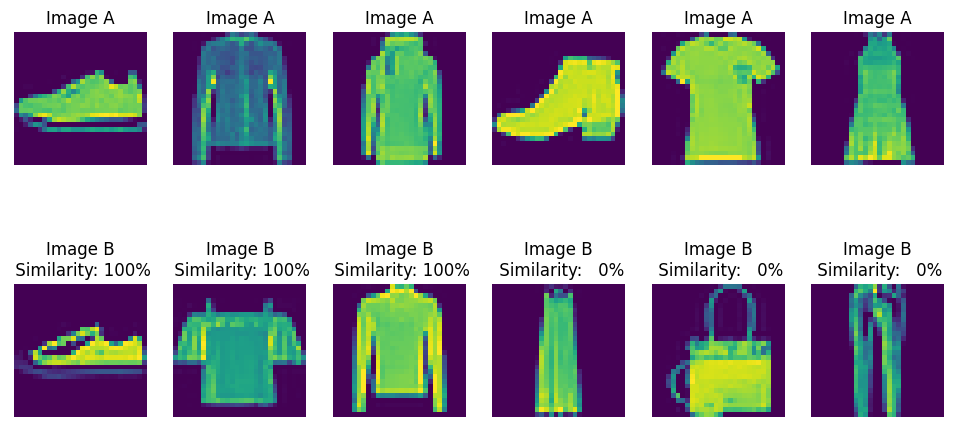

In [ ]:
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title("Image A")
    ax1.axis("off")
    ax2.imshow(c_b[:,:,0])
    ax2.set_title("Image B\n Similarity: %3.0f%%" % (100*c_d))
    ax2.axis("off")

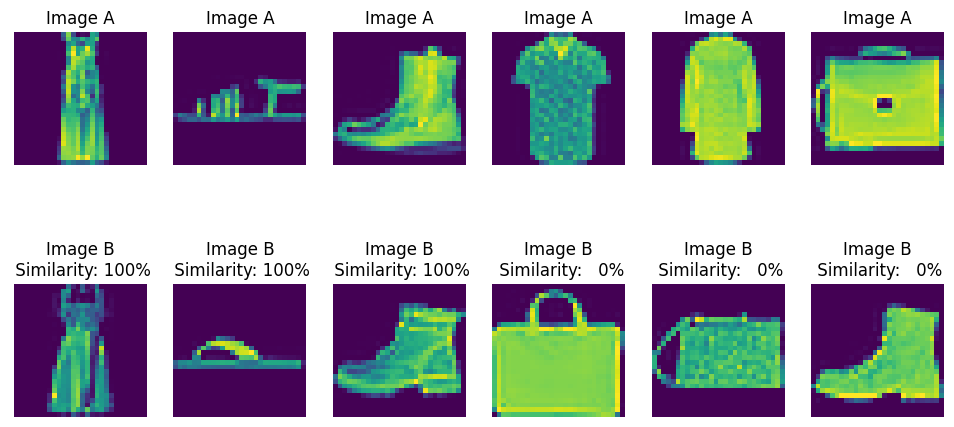

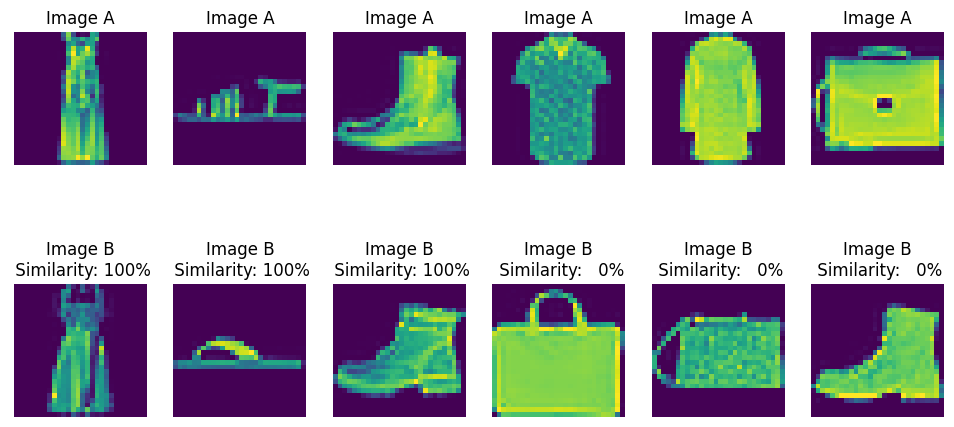

In [ ]:
def show_sim_model_output(nb_examples=3):
    pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A')
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
        ax2.axis('off')

    return fig


# a completely untrained model
show_sim_model_output()

In [ ]:
def siam_gen(in_groups, batch_size=32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size // 2)
        yield [pv_a, pv_b], pv_sim


valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit(siam_gen(train_groups),
                                              steps_per_epoch=500,
                                              validation_data=([valid_a, valid_b],
                                                               valid_sim),
                                              epochs=8,
                                              verbose=True)

Epoch 1/8
500/500 [==============================] - 56s 65ms/step - loss: 0.4702 - mae: 0.3431 - val_loss: 0.3740 - val_mae: 0.2666
Epoch 2/8
500/500 [==============================] - 28s 56ms/step - loss: 0.2988 - mae: 0.1988 - val_loss: 0.2997 - val_mae: 0.1877
Epoch 3/8
500/500 [==============================] - 28s 57ms/step - loss: 0.2819 - mae: 0.1771 - val_loss: 0.2556 - val_mae: 0.1547
Epoch 4/8
500/500 [==============================] - 32s 64ms/step - loss: 0.2576 - mae: 0.1591 - val_loss: 0.2287 - val_mae: 0.1385
Epoch 5/8
500/500 [==============================] - 27s 53ms/step - loss: 0.2581 - mae: 0.1473 - val_loss: 0.2954 - val_mae: 0.1622
Epoch 6/8
500/500 [==============================] - 27s 54ms/step - loss: 0.2798 - mae: 0.1689 - val_loss: 0.2836 - val_mae: 0.1593
Epoch 7/8
500/500 [==============================] - 28s 57ms/step - loss: 0.2624 - mae: 0.1582 - val_loss: 0.2453 - val_mae: 0.1359
Epoch 8/8
500/500 [==============================] - 27s 53ms/step - 

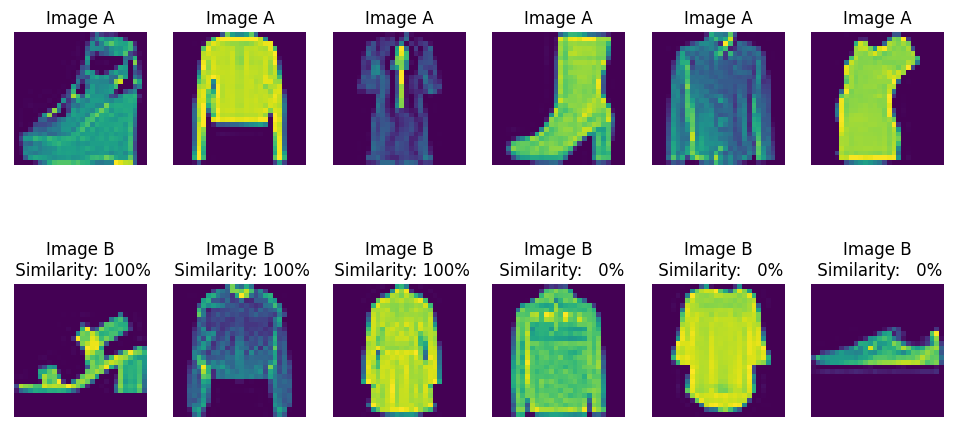

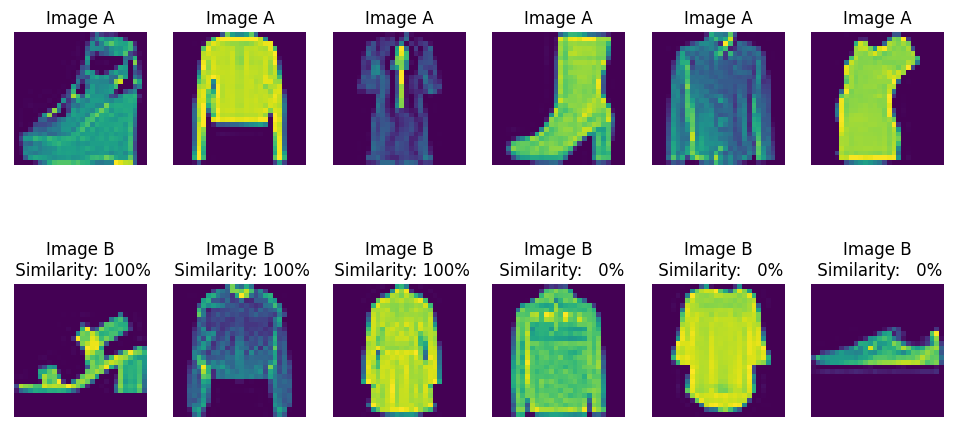

In [ ]:
show_sim_model_output()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
x_test_features = feature_model.predict(x_test, verbose=True, batch_size=128)

79/79 [==============================] - 3s 6ms/step


In [ ]:
tsne_obj = TSNE(n_components=2,
                init="pca",
                random_state=101,
                method="barnes_hut",
                n_iter=500,
                verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...
[t-SNE] Computed neighbors for 10000 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.310005
[t-SNE] KL divergence after 500 iterations: 0.763760


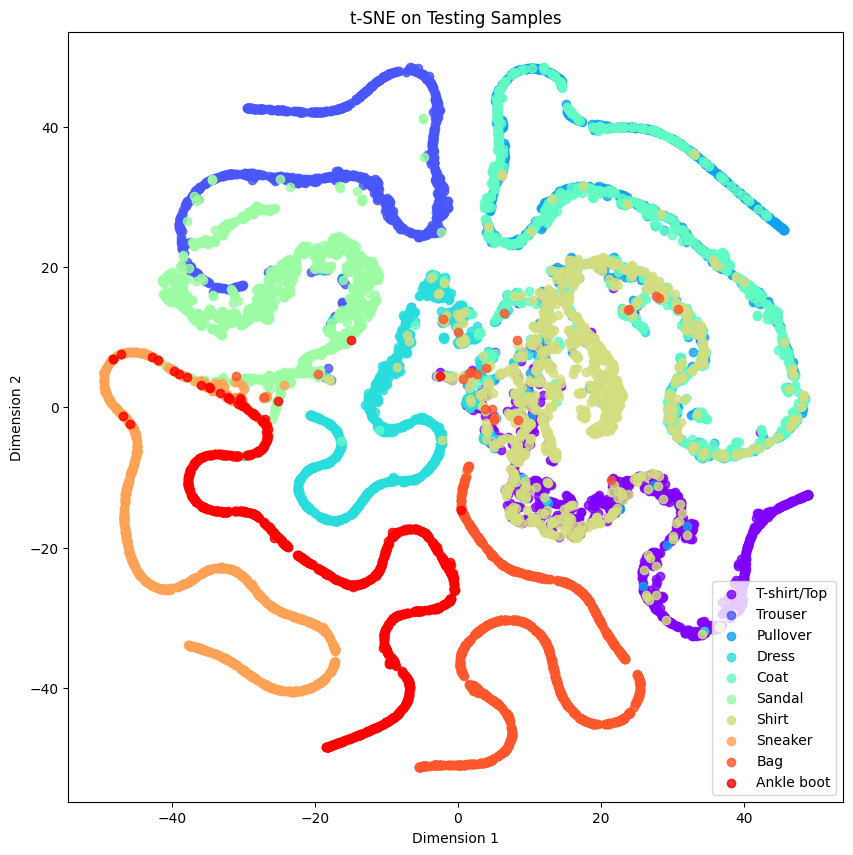

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, classes)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker="o",
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE on Testing Samples")
plt.legend(loc="best")
plt.savefig("clothes-dist.png")
plt.show(block=False)